# Análise dos dados do E-commerce OList 📊🔍

# 1.0 Introdução 📘

Nesse estudo, vamos análisar os dados do site de E-commerce, OList.
Este é um conjunto de dados público de e-commerce brasileiro com pedidos realizados na Olist Store. O conjunto de dados contém informações de 100 mil pedidos feitos entre 2016 e 2018 em diversos marketplaces no Brasil. Seus atributos permitem visualizar um pedido sob várias dimensões: desde o status do pedido, preço, pagamento e desempenho do frete, até a localização do cliente, características do produto e, por fim, avaliações escritas pelos clientes.

Também foi disponibilizado um conjunto de dados de geolocalização que relaciona os CEPs brasileiros às coordenadas de latitude e longitude.

Esses são dados comerciais reais, foram anonimizados, e as referências a empresas e parceiros nos textos das avaliações foram substituídas pelos nomes das grandes casas de Game of Thrones.

# 2.0 DataSet 📁
Informações do dataset:
Os dados analisados estão ordenados em 9 planilhas de excel: vendendores, produtos, categoria dos produtos, ordens, pagamentos das ordens, review das ordens, itens das ordens, geolocação e clientes.

# 2.1 Source  🌐
 Para esse estudo, foram usados os dados fornecedidos pelo Kaggle, "Brazilian E-Commerce Public Dataset by Olist", sobre a OList no período de 2016 até 2018.

 O Dataset pode ser encontrados no link:https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# 2.2 Informações Adicionais ℹ️
Github: https://github.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/tree/main

 # 3.0 Perguntas a serem respondidas!
 Quais são as Melhores e Piores Categorias em vendas do site? O que leva essas categorias a estarem nesse patamar?


 Quais os produtos com piores avaliações dos clientes? Quais justificativas esses produtos possuem para estar com avaliações tão baixas?



 Como é o comportamento do número de pedidos ao longo do tempo?



 Categorias com grande lucro são as melhores avaliadas?



 Houve um crescimento do E-commerce no cenário brasileiro?


# 4.0 Informações sobre os dados  🛠️

# 4.1 Bibliotecas 🐍
Bibliotecas python utilizadas:

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 4.2 Carregando os Dados 🔗
Todos os dados fornecidos pelo Kaggle.
Consiste em 9 arquivos em Excel.

In [166]:
#Caregando os DataSets
sellers = pd.read_csv('https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/sellers_dataset.csv')
product_category = pd.read_csv('https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/product_category_name_translation.csv')
products = pd.read_csv('https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/products_dataset.csv')
orders = pd.read_csv("https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/orders_dataset.csv")
order_payments = pd.read_csv('https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/order_payments_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/order_reviews_dataset.csv')
order_items = pd.read_csv("https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/order_items_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/geolocation_dataset.csv")
customers_dataset = pd.read_csv("https://raw.githubusercontent.com/GabrielAlbuquerqueDeOliveira/E-commerce-Olist-Data-Analysis/refs/heads/main/customers_dataset.csv")

# 4.3 Acessando os Dados 📚

In [167]:
# DataFrame de Vendedores
print("Vendedores:\n")
sellers.head()

Vendedores:



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [168]:
# DataFrame Categoria de Produtos
print("Categorias de Produto:\n")
product_category.head()

Categorias de Produto:



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [169]:
# DataFrame Produtos
print("Produtos:\n")
products.head()

Produtos:



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [170]:
# DataFrame de Ordens
print("Ordens:\n")
orders.head()

Ordens:



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [171]:
# DataFrame pagamento de Ordens
print("Pagamentos de Ordens:\n")
order_payments.head()

Pagamentos de Ordens:



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [172]:
# DataFrame Review das Ordens
print("Review das Ordens:\n")
order_reviews.head()

Review das Ordens:



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [173]:
# DataFrame Itens das Ordens
print("Itens das ordens:\n")
order_items.head()

Itens das ordens:



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [174]:
# DataFrame de Geolocação
print("Geolocação:\n")
geolocation.head()

Geolocação:



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [175]:
# DataFrame de Clientes
print("Clientes:\n")
customers_dataset.head()

Clientes:



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 4.4 Data Info 📄

In [176]:
# Informação de Vendedores
print("Vendedores:\n")
sellers.info()

Vendedores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [177]:
# Informação de Categoria de Produtos
print("Categorias de Produto:\n")
product_category.info()

Categorias de Produto:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [178]:
# Informações de Produtos
print("Produtos:\n")
products.info()

Produtos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [179]:
# Informação das Ordens
print("Ordens:\n")
orders.info()

Ordens:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [180]:
# Informação pagamento de Ordens
print("Pagamentos de Ordens:\n")
order_payments.info()

Pagamentos de Ordens:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [181]:
# Informação Review das Ordens
print("Review das Ordens:\n")
order_reviews.info()

Review das Ordens:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [182]:
# Informação dos itens as ordens
print("Itens das ordens:\n")
order_items.info()

Itens das ordens:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [183]:
# Informações de Geolocação
print("Geolocação:\n")
geolocation.info()

Geolocação:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [184]:
# Informação de Clientes
print("Clientes:\n")
customers_dataset.info()

Clientes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# 5.0 Análise de Lucro, Reviews e Categorias 📈


# Agregando os datasets para análises
Vamos combinar os dataframes para extrair informações e conseguir encontrar os produtos mais vendidos, suas categorias, e o lucro dos produtos.

In [185]:
#Criar um Data set para os produtos mais vendidos

produtos_preco_quantidade = order_items.groupby('product_id').agg({
    'price': 'mean',
    'product_id': 'count',
    'freight_value': 'mean',
    'order_id': pd.Series.nunique # conta apenas ordens únicas
    }).rename(columns={'product_id': 'quantidade',
                       'freight_value': 'frete_medio',
                       'price': 'preco',
                       'order_id': 'ordem_unica'
                       })

    # Cria novo dataframe copiando os dados
lucro_dos_produtos = produtos_preco_quantidade.copy()

In [186]:
# Calcular o lucro por produto
lucro_dos_produtos['lucro_produtos'] = (
    produtos_preco_quantidade['preco'] * produtos_preco_quantidade['quantidade']) - (produtos_preco_quantidade['frete_medio'] * produtos_preco_quantidade['ordem_unica'])

In [187]:
# Identificar quais são as categorias dos produtos mais vendidos
produtos_detalhados = pd.merge(lucro_dos_produtos,
                             products[['product_id', 'product_category_name']],
                             on='product_id',
                             how='left' #left join para manter todos os produtos com lucro
                             ).rename(columns={
                                 'product_category_name': 'categoria_produto'})

In [188]:
# Identificar quais são as categorias que possuem o maior lucro    .
def categorias_campeas(produtos_detalhados):
    # Agrupa o lucro total por categoria
    lucro_por_categoria = (
        produtos_detalhados.groupby('categoria_produto')['lucro_produtos']
        .sum()
        .reset_index()
    )

    # Calcula o terceiro quartil (Q3)
    q3 = lucro_por_categoria['lucro_produtos'].quantile(0.75)

    # Filtra as categorias com lucro acima de Q3
    top_categorias = lucro_por_categoria[lucro_por_categoria['lucro_produtos'] > q3]

    # Ordena do maior para o menor lucro (opcional)
    top_categorias = top_categorias.sort_values(by='lucro_produtos', ascending=False)

    # Formata como moeda BRL sem centavos (ex: R$ 1.234.567)
    top_categorias['lucro_produtos_reais'] = top_categorias['lucro_produtos'].apply(
        lambda x: f"R$ {int(x):,}".replace(",", ".")
    )

    return top_categorias

# Usar a função
categorias_acima_q3 = categorias_campeas(produtos_detalhados)

In [189]:
categorias_acima_q3

,categoria_produto,lucro_produtos,lucro_produtos_reais
66,relogios_presentes,1.107541e+06,R$ 1.107.541
11,beleza_saude,1.086282e+06,R$ 1.086.281
13,cama_mesa_banho,8.487603e+05,R$ 848.760
32,esporte_lazer,8.328704e+05,R$ 832.870
44,informatica_acessorios,7.818011e+05,R$ 781.801
54,moveis_decoracao,5.848078e+05,R$ 584.807
26,cool_stuff,5.542266e+05,R$ 554.226
8,automotivo,5.054779e+05,R$ 505.477
72,utilidades_domesticas,5.029409e+05,R$ 502.940
12,brinquedos,4.087274e+05,R$ 408.727


Para estatisticamente ter sentido, pegamos todas as categorias cujos lucro ficaram acima do terceiro quartil (Q3) para representar as melhores categorias.

In [190]:
def categorias_fracassadas(produtos_detalhados):
    # Agrupar o lucro total por categoria
    lucro_por_categoria = (
        produtos_detalhados.groupby('categoria_produto')['lucro_produtos']
        .sum()
        .reset_index()
    )

    # Calcular o 10º percentil
    q10 = lucro_por_categoria['lucro_produtos'].quantile(0.10)

    # Filtrar categorias com lucro abaixo do Q10
    piores_categorias = lucro_por_categoria[lucro_por_categoria['lucro_produtos'] < q10]

    # Ordenar do menor para o maior lucro (opcional)
    piores_categorias = piores_categorias.sort_values(by='lucro_produtos', ascending=True)

    return piores_categorias

categorias_abaixo_q10 = categorias_fracassadas(produtos_detalhados)

In [191]:
categorias_abaixo_q10

,categoria_produto,lucro_produtos
67,seguros_e_servicos,242.070000
15,casa_conforto_2,431.216154
37,fashion_roupa_infanto_juvenil,474.340000
17,cds_dvds_musicais,537.151429
41,flores,683.368333
42,fraldas_higiene,1151.093810
60,pc_gamer,1425.383333
4,artes_e_artesanato,1443.880000


Para estatisticamente ter sentido, pegamos todas as categorias cujos lucro ficaram baixo do 10º percentil para representar as piores categorias.

In [192]:
# Identificar os "Produtos Campeões!!!"

def top_8_produtos(produtos_detalhados):
    top_produtos = (
        produtos_detalhados.sort_values(by='lucro_produtos', ascending=False) #ordena do maior para o menor
        .head(8)
        )
    return top_produtos

produtos_campeoes = top_8_produtos(produtos_detalhados)

Foi criado o dataset contendo informações para:


*   Categorias mais vendidas "Categorias Campeãs",

*   Categorias menos vendidas "Piores Categorioas"

*   Categoria dos produtos que mais foram vendidos "Produtos Campeões"

Agora, vamos visualizar essas informações de uma forma mais ilustrativa.

# 5.1 Visualização das Melhores & Piores Categorias 📌

Vamos criar gráficos para melhor ilustrar nossos datasets com as categorias que obtiveram o maior lucro e o menor lucro.

<Figure size 800x600 with 0 Axes>

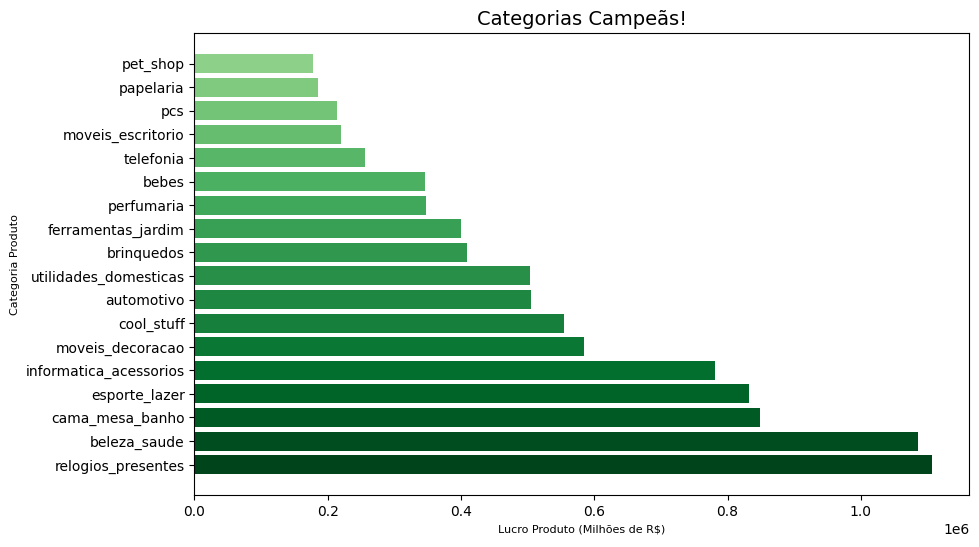

In [193]:
# Criar gráfico das "Categorias Campeãs!!!"

#Tamanho do gráfico
plt.figure(figsize=(8, 6))

# Cria gráfico dde barras com indice e contagem

import matplotlib.cm as cm
cores = cm.Greens(np.linspace(1.0, 0.4, 19)) # valores entre 0.9 (mais forte) e 0.3 (mais claro)

plt.figure(figsize=(10, 6))
plt.barh(categorias_acima_q3['categoria_produto'], categorias_acima_q3['lucro_produtos'], color= cores)
# Rotulo do eixo x, letra tamanho 8
plt.xlabel('Lucro Produto (Milhões de R$)', fontsize=8)

# Rotulo do eixo y, letra tamanho 8
plt.ylabel('Categoria Produto', fontsize=8)

# Titulo, letra tamanho 14
plt.title('Categorias Campeãs!', fontsize=14)

plt.show()

🏆 **Melhores categorias** de produtos mais vendidos.
--------------------------------------------------------------------------------
Pode-se observar um gráfico com as categorias de produtos que se encontram acima do terceiro quartil (Q3) em relação ao lucro.
Essas categorias representam os produtos mais vendidos, e assim chegamos em algumas conclusões:

⌚ **Relógios e presentes** - É possível notar que a categoria de relógios e presentes faz completamente sentido estar como a mais vendida, sendo frequentemente uma categoria muito famosa em diversos sites de E-Commerce.

Isso se da por alguns fatos:

*   Não exige experimentação complexa.

*   Possuí forte apelo emocional - >
      Frequentemente usados como presentes, marcadores de status e símbolos de conquistas.

*   Grande Variedade de preços - >
  	É possível qualquer pessoa achar um relógio dentro do seu orçamento.

*   Datas sazonais impulsionam vendas - >
    Dia dos namorados, Black Friday, Natal, pessoas nessas ocasiões tendem a  procurar por essa categoria para presentearem seus entes queridos, impulsionando bastante as vendas.

💄 **Beleza e saúde** - A Categoria beleza e saúde ficou logo atrás, também representando um número altíssimo de venda.

Isso também pode ser justificado por alguns motivos:

*   Alto consumo recorrente - >
    Produtos como shampoo, maquiagem, cremes, vitaminas e perfumes acabam rápido e são recomprados frequentemente.

*   Facilidade de envio e lucro - >
    Maquiagens e outros cosmédicos podem ser produtos muito pequenos mas com um valor altíssimo, tendo um envio relativamente fácil com um alto lucro.

*   Produtos com apelo emocional e aspiracional - >
    Pessoas compram não só pela necessidade, mas pelo desejo de se sentir melhor, mais confiantes ou mais saudáveis.

*   Tamanhos e características padronizados - >
    Um "Batom Ruby Woo da MAC" é igual em qualquer loja, diferente de roupas ou calçados que têm variação de tamanho.

*   Facilidade de recomendação - >
    Muito conteúdo em vídeo, redes sociais, influenciadores e reviews ajudam os clientes a decidirem e plataformas recomendam produtos com base em tendências, perfil e histórico de compras.

A Americas Market Inteligence fez um artigo detalhando mais essa questão das maiores categorias de vendas do E-commerce Brasileiro e suas justificativas.

link para o artigo: https://americasmi.com/insights/brazil-ecommerce-market-data/

📉 **Piores categorias**
--------------------------------------------------------------------------------
Observando o gráfico das **piores categorias**, as categorias que se encontraram abaixo do primeiro quartil (Q1) em relação ao lucro, podemos chegar a algumas conclusões:

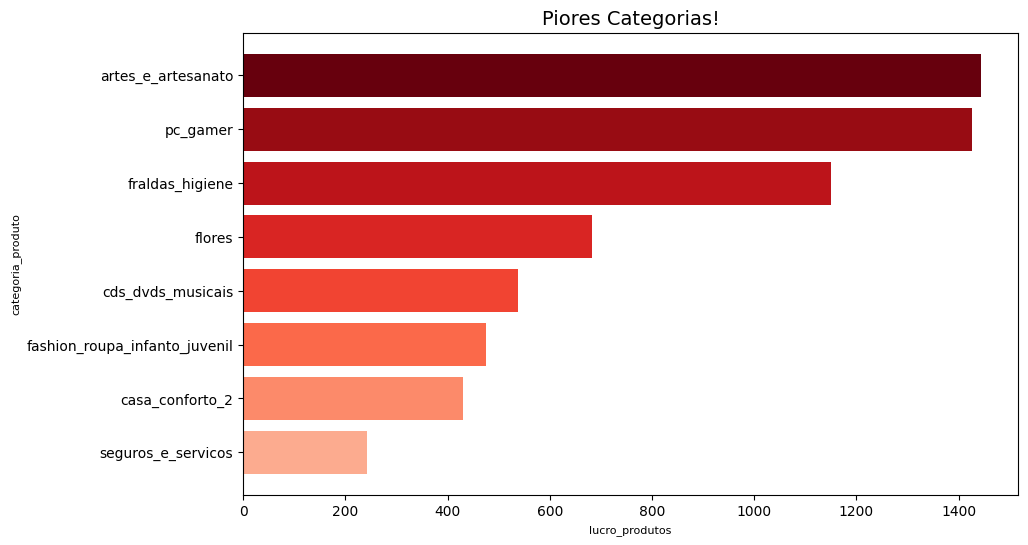

In [194]:
# Criar gráfico das "Categorias piores!!!"
cores_negativas = cm.Reds(np.linspace(0.3, 1.0, 8)) # valores entre 0.9 (mais forte) e 0.3 (mais claro)

plt.figure(figsize=(10, 6))
plt.barh(categorias_abaixo_q10['categoria_produto'], categorias_abaixo_q10['lucro_produtos'], color= cores_negativas)
# Rotulo do eixo x, letra tamanho 8
plt.xlabel('lucro_produtos', fontsize=8)

# Rotulo do eixo y, letra tamanho 8
plt.ylabel('categoria_produto', fontsize=8)

# Titulo, letra tamanho 14
plt.title('Piores Categorias!', fontsize=14)

plt.show()


🍼Fraldas e Higiene possue um caso interessante - Por mais que fraldas possam parecer essencial, no E-commerce ela possue uma venda baixíssima.

Vários fatores explicam esse comportamento:

  *   Alta Urgência - >
      Quando um item de higiene (como fralda, papel higiênico, desodorante) acaba, as pessoas querem o produto na hora e não se dispõem a esperar a entrega do E-commerce.

  *   Produtos volumosos e pesado - >
      Isso aumenta o custo de frete, e os consumidores evitam comprar online quando o valor total (produto + entrega) sai mais caro do que na loja física.

  *   Alta disponibilidade no varejo tradicional - >
      Produtos de higiene estão em qualquer supermercado ou farmácia, próximos da casa do consumidor.

  Aqui está um link de uma matéria da "Made-in-China" detalhando mais esse comportamento das fraldas em E-commerce: https://insights.made-in-china.com/pt/United-States-The-New-Generation-of-Mothers-Prefers-to-Buy-Baby-Products-Online-But-Diapers-Are-Still-Bought-in-Physical-Stores_SGTasfMKvQIt.html


💿Cds & dvds - > A baixa venda dessa categoria pode ser explicada pelo obsoletismo que esses produtos passam nos dias atuais pois os consumidores preferem plataformas de streaming, ou assistir o mesmo conteúdo no Youtube gratuitamente.


🌸Flores - Alguns fatores dessa categoria claramente influenciam a sua baixa venda:

* Produto altamente perecível - >
Flores têm vida útil curta e demandam transporte cuidadoso e com temperatura controlada.

* Logística complexa - >
Flores são frágeis: amassam, murcham, ou quebram durante o transporte.
É difícil manter a qualidade da entrega em escala nacional, o que torna o modelo desafiador para marketplaces como OList, Amazon ou Mercado Livre.

* Compras com forte senso de urgência - >
Muitas vezes são adquiridas para ocasiões especiais e de última hora (ex: Dia das Mães, Dia dos Namorados, aniversários).

# 5.2 Reviews Dos Usuários ⭐
Agora vamos analisar as reviews (avaliações) que os usuários deixaram para os produtos do site.

As avaliações consistem em uma nota de 1 a 5, como uma forma de determinar o grau de satisfação do cliente/ qualidade que o cliente julga que o produto possuí.

In [195]:
# Merge dos dados das reviews de usuários por categorias.

reviews_produtos_detalhados = pd.merge(produtos_detalhados[['product_id', 'ordem_unica', 'lucro_produtos', 'categoria_produto' ]],
                                       order_items[['product_id', 'order_id','seller_id']],
                                       on='product_id',
                                       how='left'
                                       )

avaliacoes_produtos = pd.merge(reviews_produtos_detalhados[['order_id', 'product_id', 'categoria_produto', 'seller_id']],
                               order_reviews[['order_id', 'review_id', 'review_score']],
                               on='order_id',
                               how='inner' # podia ser 'left' para manter todas as reviews mesmo sem produto
                               )

In [196]:
# Função para captar as piores avaliações para cada categoria de produto.
# Colocamos um mínimo de 30 avaliações para não pegarmos produtos com viés comprometido por conta de 1 ou duas reviews apenas.

def categorias_piores_avaliacoes(avaliacoes_produtos, min_avaliacoes=35):
    media_scores = (
        avaliacoes_produtos.groupby('categoria_produto')['review_score']
        .agg(['mean', 'count']) # calcula a média e a quantidade
        .rename(columns={'mean': 'media_review', 'count': 'num_avaliacoes'})
        )
    # filtra categorias com avaliações suficientes
    resumo_filtrado = media_scores[media_scores['num_avaliacoes'] >= min_avaliacoes]

    # Ordena pela pior média e pega as 5 piores
    piores = resumo_filtrado.sort_values(by='media_review', ascending=True).head(5)

    return piores.reset_index(
        )
# Encontrei as categorias que estão piores avaliadas
piores_avaliacoes_categorias = categorias_piores_avaliacoes(avaliacoes_produtos, 35)

In [197]:
# Mostrar o dataframe das piores categorias
piores_avaliacoes_categorias.head().sort_values(by='media_review', ascending=False)

,categoria_produto,media_review,num_avaliacoes
4,artigos_de_festas,3.767442,43
3,telefonia_fixa,3.671698,265
2,fashion_roupa_masculina,3.621212,132
1,moveis_escritorio,3.484421,1701
0,fraldas_higiene,3.256410,39


Dataframe que revela as 5 categorias que tem pior média de avaliação.
Reparem que  a categoria de fraldas e higiene possuí a pior média, de: 3,25.

In [198]:
# Piores avaliações por produto! separado por categoria

def produtos_piores_avaliacoes(avaliacoes_produtos, min_avaliacoes=35):
    # Agrupa por product_id e calcula a média de review_score
    media_reviews = avaliacoes_produtos.groupby('product_id')['review_score'].mean().reset_index()

    # Ordena do menor para o maior
    media_reviews = media_reviews.sort_values(by='review_score', ascending=True)

    # Junta com a categoria do produto
    categorias_piores_produtos = avaliacoes_produtos[['product_id', 'categoria_produto']].drop_duplicates()
    piores_avaliacoes_produtos = media_reviews.merge(categorias_piores_produtos, on='product_id', how='left')
    return piores_avaliacoes_produtos.head()

piores_avaliacoes_produtos = produtos_piores_avaliacoes(avaliacoes_produtos, 35)

In [199]:
# Mostrar o dataframe das categorias dos piores produtos
piores_avaliacoes_produtos.head().sort_values(by='review_score', ascending=True)

,product_id,review_score,categoria_produto
0,73a6530caef9511c04711d12dcef551c,1.0,moveis_escritorio
1,3907f392eb7a6ba1d75fb55b28f7a27e,1.0,brinquedos
2,0f343c0a45653e6efea356d147833357,1.0,moveis_decoracao
3,0f3a9ee2528678ce70458e2dde0a5bfd,1.0,eletronicos
4,746191562977a60292922c316e21720b,1.0,automotivo


Aqui temos um dataframe exibindo quais foram os 5 piores avaliados produtos e suas categorias.

In [200]:
# Quantas reviews temos para cada nota do review.
reviews_qtd_por_nota = (
    avaliacoes_produtos
    .groupby('review_score')['order_id'].nunique()
    .reset_index()
    .sort_values('review_score')
    )
reviews_qtd_por_nota.columns = ['review_score', 'num_ordens']

# Calcular porcentagem
total_ordens = reviews_qtd_por_nota['num_ordens'].sum()
reviews_qtd_por_nota['porcentagem'] = (reviews_qtd_por_nota['num_ordens']/ total_ordens) * 100


In [201]:
# Mostrar o dataframe do número de reviews para cada nota.
reviews_qtd_por_nota.head()

,review_score,num_ordens,porcentagem
0,1,11273,11.401380
1,2,3168,3.204078
2,3,8215,8.308554
3,4,19121,19.338754
4,5,57097,57.747234


Criamos o dataframe para o número de ordens feitas em todas as notas: 1, 2, 3, 4 e 5 das avaliações.

# 5.3 Gráficos piores avaliações de clientes 📢
Partindo para uma abordagem mais ilustrativa sobre as avaliações:


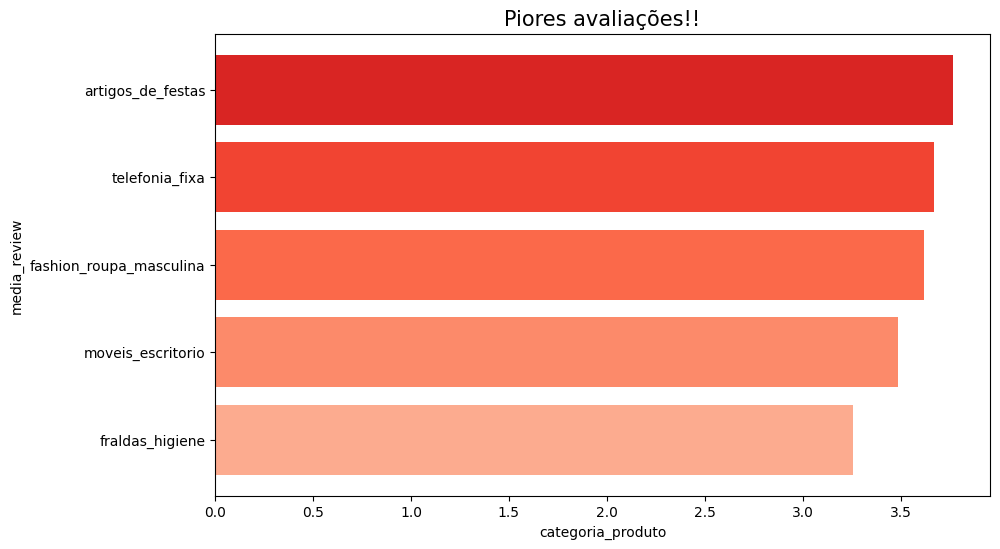

In [202]:
# Gráfico das piores avaliações por categorias

plt.figure(figsize=(10, 6))
plt.barh(piores_avaliacoes_categorias['categoria_produto'], piores_avaliacoes_categorias['media_review'], color= cores_negativas)
# Rotulo do eixo x, letra tamanho 8
plt.xlabel('categoria_produto', fontsize=10)

# Rotulo do eixo y, letra tamanho 8
plt.ylabel('media_review', fontsize=10)

# Titulo, letra tamanho 14
plt.title('Piores avaliações!!', fontsize=15)

plt.show()

Exibição dos gráficos das piores avaliações e suas conclusões.

Para as avaliações da categoria 🍼**fraldas e higiene**, faz jus com a análise do número de vendas que vimos acima.
Justificando que grande parte do motivo do número de vendas ser tão baixo se da pela baixa qualidade das fraldas. Mas vamos ver que nem sempre essa teoria é aplicável.

Vamos criar um dataframe com produtos que foram avaliados com nota 1 e contar quantas dessas categorias se repetiram.

In [203]:
def contar_produtos_nota_1(avaliacoes_produtos):
    # Filtrar apenas as avaliações nota 1
    notas_1 = avaliacoes_produtos[avaliacoes_produtos['review_score'] == 1]

    # Obter produtos únicos com nota 1 e suas respectivas categorias
    produtos_nota_1 = notas_1[['product_id', 'categoria_produto']].drop_duplicates()

    # Contar quantos produtos únicos com nota 1 há por categoria
    contagem_categorias = (
        produtos_nota_1['categoria_produto']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'categoria_produto', 'categoria_produto': 'categoria'})
    )

    return contagem_categorias

In [204]:
piores_avaliacoes_produtos = contar_produtos_nota_1(avaliacoes_produtos)

Aqui podemos ver uma lista das principais categorias que mais possuem produtos avaliados com a nota 1.

Vamos tomar algumas conclusões com essa lista e com o gráfico a seguir.

In [205]:
piores_avaliacoes_produtos.head(9)

,categoria,count
0,cama_mesa_banho,879
1,moveis_decoracao,670
2,esporte_lazer,621
3,beleza_saude,528
4,utilidades_domesticas,483
5,informatica_acessorios,471
6,automotivo,362
7,telefonia,332
8,relogios_presentes,319


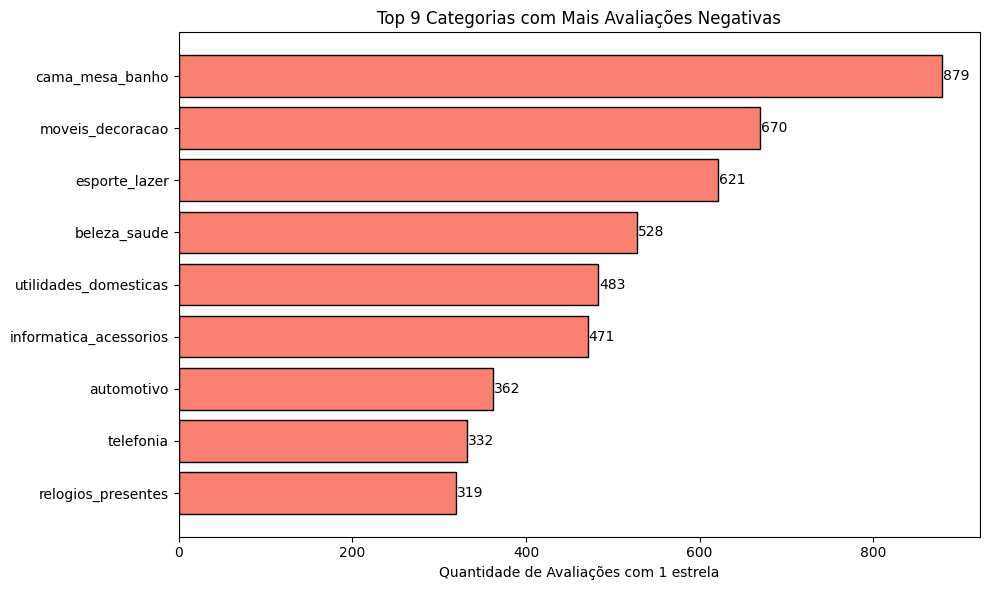

In [206]:
# Selecionar os 9 produtos com mais avaliações negativas
top_9 = piores_avaliacoes_produtos.nlargest(9, 'count')

# Configurar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(top_9['categoria'], top_9['count'], color='salmon', edgecolor='black')
plt.xlabel('Quantidade de Avaliações com 1 estrela')
plt.title('Top 9 Categorias com Mais Avaliações Negativas')
plt.gca().invert_yaxis()  # Inverter eixo para mostrar o maior no topo

# Adicionar rótulos nas barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center')

plt.tight_layout()
plt.show()

Agora olhando para os produtos separadamente 📉

Podemos reparar que das categorias que mais receberam avaliações 1 estrela, podemos encontrar **moveis_decoracao**, **beleza_saude**, **relogios_presentes**, **automotivo** e **esporte_lazer**, que também estão nas categorias com o maior lucro.

Encontramos várias categorias que possuem alto lucro mas também são as piores avaliadas.Um pouco contraditório, mas vamos entender por que isso acontece.

1. Produtos populares ≠ produtos bem avaliados

Essas categorias vendem muito — e, quanto mais se vende, mais avaliações aparecem (inclusive as negativas). Como você viu nos dados, o volume de pedidos é alto, mas isso expõe falhas que outras categorias com menos vendas não mostram tanto.

2. Expectativas altas + subjetividade

Beleza e saúde: produtos que lidam com o corpo e a autoestima. Pequenas frustrações viram grandes decepções.

Móveis e decoração: o cliente espera algo bonito, funcional e que chegue intacto. Qualquer riscado, atraso ou diferença de cor pode gerar uma avaliação 1 estrela.


3. Problemas logísticos impactam mais essas categorias

Você viu que frete e tempo de entrega influenciam nas notas. Móveis, por exemplo, são pesados, grandes e mais difíceis de transportar. Produtos de beleza podem ser frágeis (quebrar, vazar, etc). Isso aumenta o risco de o cliente se frustrar com a entrega.

4. Marketing engana → expectativas frustradas

Essas categorias frequentemente usam imagens muito bonitas nos anúncios, o que cria uma expectativa visual e sensorial alta. Se o produto não corresponder (cor, tamanho, qualidade), a decepção é imediata — e vem com 1 estrela.

5. Margem de lucro alta = mais exposição

Por serem categorias lucrativas, as lojas investem mais em divulgação e vendas. Isso atrai mais consumidores — e, consequentemente, mais chances de feedbacks negativos se a experiência não for boa.


Quantidade de Avaliações por cada nota das reviews
--------------------------------------------------------------------------------
Observa-se o gráfico da quantidade de reviews para cada nota de 1, 2, 3, 4 e 5.

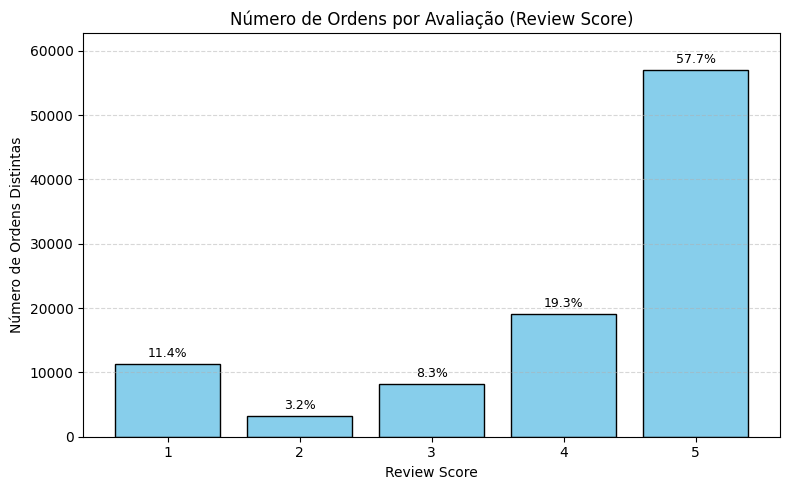

In [207]:
# Plotando o gráfico da quantidade de reviews para cada nota.

# Calcula o total de ordens para calcular a porcentagem
total_ordens = reviews_qtd_por_nota['num_ordens'].sum()

y_max = reviews_qtd_por_nota['num_ordens'].max() * 1.1

plt.figure(figsize=(8, 5))
plt.bar(reviews_qtd_por_nota['review_score'], reviews_qtd_por_nota['num_ordens'], color='skyblue', edgecolor='black')

# Adiciona os rótulos com porcentagem no topo das barras
for i, row in reviews_qtd_por_nota.iterrows():
    porcentagem = row['num_ordens'] / total_ordens * 100
    plt.text(row['review_score'], row['num_ordens'] + (y_max * 0.01), f'{porcentagem:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Review Score')
plt.ylabel('Número de Ordens Distintas')
plt.title('Número de Ordens por Avaliação (Review Score)')
plt.xticks(reviews_qtd_por_nota['review_score'])  # Garante que todos os scores apareçam no eixo X
plt.ylim(0, y_max)  # Limita o eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Com esse gráfico é possível notar que as avaliações positivas são majoritariamente maiores que as negativas.

As avaliações 5 estrelas sendo 57,74% do total das avaliações.

 # 6.0 Análise dos pedidos por região e tempo 🧾⏳
Vamos checar quantas ordens foram feitas para cada região do Brasil, para descobrir quais cidades mais realizaram pedidos.

In [208]:
# Pegar as ordens por região do Brasil

sellers_region = pd.merge(reviews_produtos_detalhados[['product_id','lucro_produtos', 'categoria_produto', 'order_id', 'seller_id']],
                          sellers[['seller_id', 'seller_city', 'seller_state']],
                          on='seller_id',
                          how='left'
                          )

In [209]:
# Contar quantas orderns foram feitas por cada cidade e qual cidade realizou mais pedidos

def contar_pedidos_por_cidade(sellers_region):
    pedidos_por_cidade = (
        sellers_region.groupby('seller_city')['order_id']
        .nunique() # conta quantas ordens únicas por cidade
        .sort_values(ascending=False)
        .reset_index(name='num_pedidos')
                    )
    return pedidos_por_cidade

cidades_mais_pedidos = contar_pedidos_por_cidade(sellers_region)

In [210]:
cidades_mais_pedidos.head()

,seller_city,num_pedidos
0,sao paulo,24588
1,ibitinga,6565
2,curitiba,2722
3,santo andre,2711
4,belo horizonte,2414


Dataframe contendo as 5 cidades com o mais número de pedidos da OList.

# Pedidos por mês
Agrupamento das ordens feitas para cada mês do nosso dataset.

In [211]:
# Ordens totais do E-Commerce
# Ver quantas ordens foram feitas para cada mês

def contar_ordens_por_mes(orders):
    # Conta o número de entregas (order_id) feitas em cada mês com base na coluna order_purchase_timestamp

    orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

    # Cria uma nova coluna 'mes' no formato 'YYYY-MM'
    orders['mes'] = orders['order_purchase_timestamp'].dt.to_period('M').astype(str)

    # Agrupa por mês e conta os pedidos únicos (order_id)
    entregas_por_mes = orders.groupby('mes')['order_id'].nunique().reset_index()

    entregas_por_mes.columns = ['mes', 'total_pedidos']

    #ordena cronologicamente
    entregas_por_mes = entregas_por_mes.sort_values(by='mes')

    return entregas_por_mes
pedidos_por_mes = contar_ordens_por_mes(orders)

Aqui, separamos as ordens feitas por mês desde 2016, mais ou menos o início do site da Olist ( O List começou em Fev de 2015) até 2018.

Assim teremos uma noção de quantas ordens ocorrem por mês e o total de ordens para cada mês.

In [212]:
pedidos_por_mes

,mes,total_pedidos
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [213]:
# Remover os outliers da coluna do total de ordens
def remover_outliers_manual(pedidos_por_mes, coluna='total_pedidos', min_val=100):

  # Remove outliers definindo manualmente os valores mínimo e máximo aceitáveis
    return pedidos_por_mes[(pedidos_por_mes['total_pedidos']>=min_val)]

pedidos_mes_ajustados = remover_outliers_manual(pedidos_por_mes, 'total_pedidos')

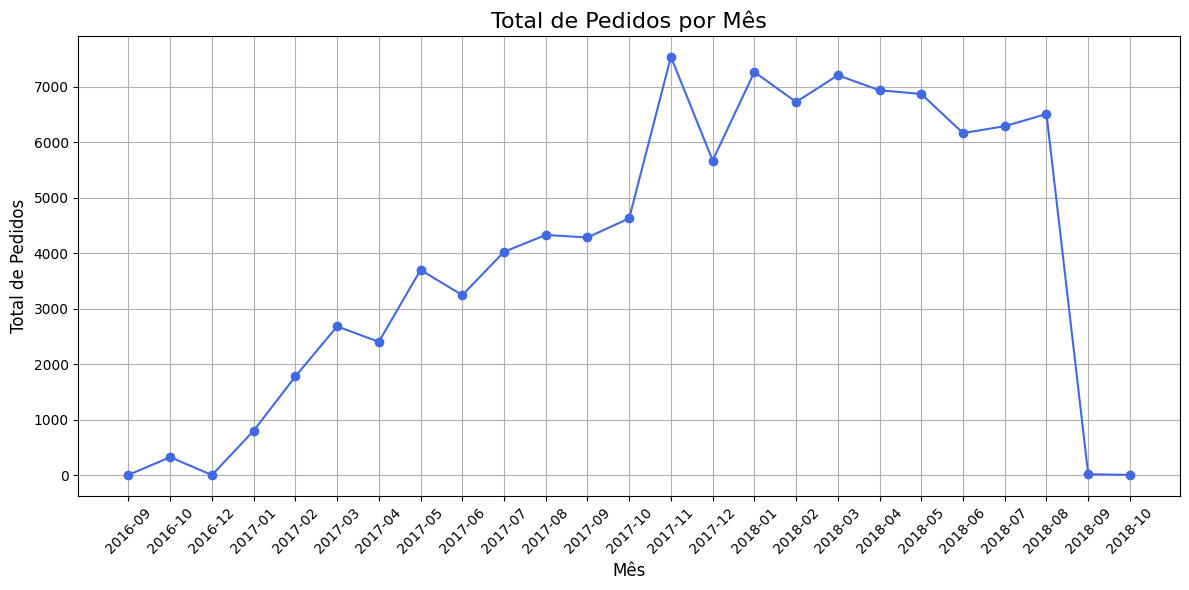

In [214]:
# Plotar o gráfico das ordens por mês
plt.figure(figsize=(12, 6))
plt.plot(pedidos_por_mes['mes'], pedidos_por_mes['total_pedidos'], marker='o', color='royalblue')
plt.title('Total de Pedidos por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nota-se que o dataframe parou de ter dados para depois do mês de Setembro de 2018, por isso a súbita queda, e não por que os pedidos no site pararam de ocorrer.

# Pedidos por dias da Semana
Vamos agora agrupar os dados por dia da semana

In [215]:
# Criar coluna com o dia da semana (ex: Monday, Tuesday...)
orders['dia_semana'] = orders['order_purchase_timestamp'].dt.day_name()

# Agrupar e contar pedidos por dia da semana
compras_por_dia_semana = orders['dia_semana'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()     #Reindex reorganiza as linhas ou colunas de acordo com uma nova ordem especificada.

#renomear colunas
compras_por_dia_semana.rename(columns ={
    'count': 'total_pedidos'}, inplace=True)

# Renomear colunas
dias_em_portugues ={
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
compras_por_dia_semana['dia_semana'] = compras_por_dia_semana['dia_semana'].map(dias_em_portugues)
    # calcular porcentagem
total_geral = compras_por_dia_semana['total_pedidos'].sum()
compras_por_dia_semana['porcentagem'] = (compras_por_dia_semana['total_pedidos'] / total_geral * 100)

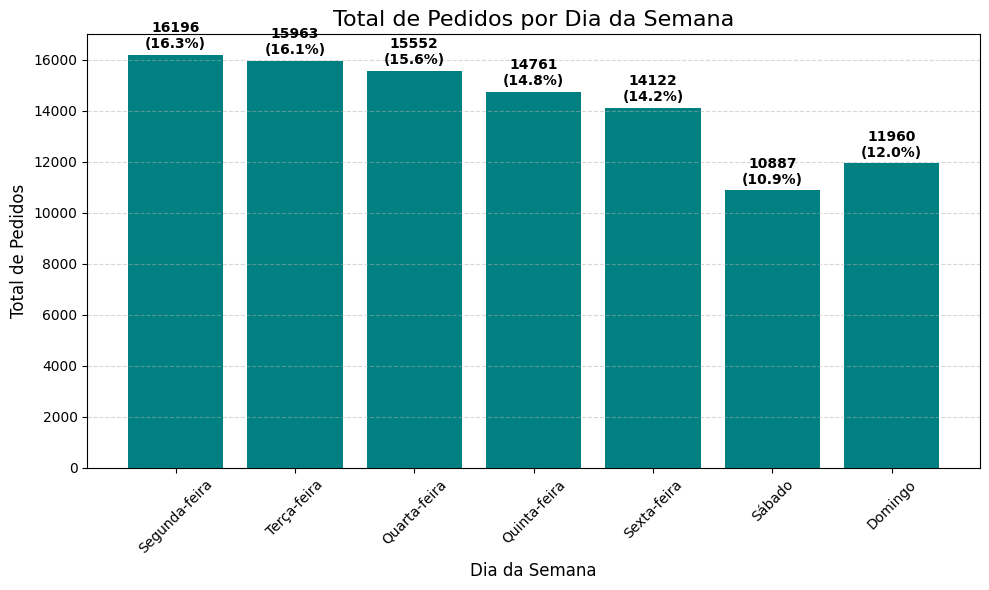

In [216]:
# Plotar gráfico de barras para os dias da semana que as ordens são feitas!

plt.figure(figsize=(10, 6))

# Capturar as barras para usar no loop
bars = plt.bar(
    compras_por_dia_semana['dia_semana'],
    compras_por_dia_semana['total_pedidos'],
    color='teal'
    )
plt.title('Total de Pedidos por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionra o valor e a porcentagem em cima de cada barra

for bar, total, pct in zip(bars, compras_por_dia_semana['total_pedidos'], compras_por_dia_semana['porcentagem']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + total * 0.01,  # ajuste de altura para evitar sobreposição
        f'{int(total)}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

Aqui observamos o mapeamento do total de pedidos feitos pelo dia da semana.


Podemos que a maioria dos pedidos são feitos no começo da semana, entre segunda e quarta-feira.

# Ordens por horário e dia
Agrupamento das ordens por horário e dia 🕒

In [217]:
# Agrupar as ordens por horário do dia!

# Criar uma nova coluna com o horário (hora do dia)
orders['hora'] = orders['order_purchase_timestamp'].dt.hour

def classificar_periodo(hora):
    if 5 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 17:
        return 'Tarde'
    elif 17 <= hora < 21:
        return 'Noite'
    else:
        return 'Madrugada'

    # Aplicar a função ao dataframe
orders['periodo_dia'] = orders['hora'].apply(classificar_periodo)

# Agrupar por período do dia
compras_por_periodo = orders['periodo_dia'].value_counts().reindex(
    ['Madrugada', 'Manhã', 'Tarde', 'Noite']
).reset_index()

compras_por_periodo.columns = ['periodo_dia', 'total_pedidos']

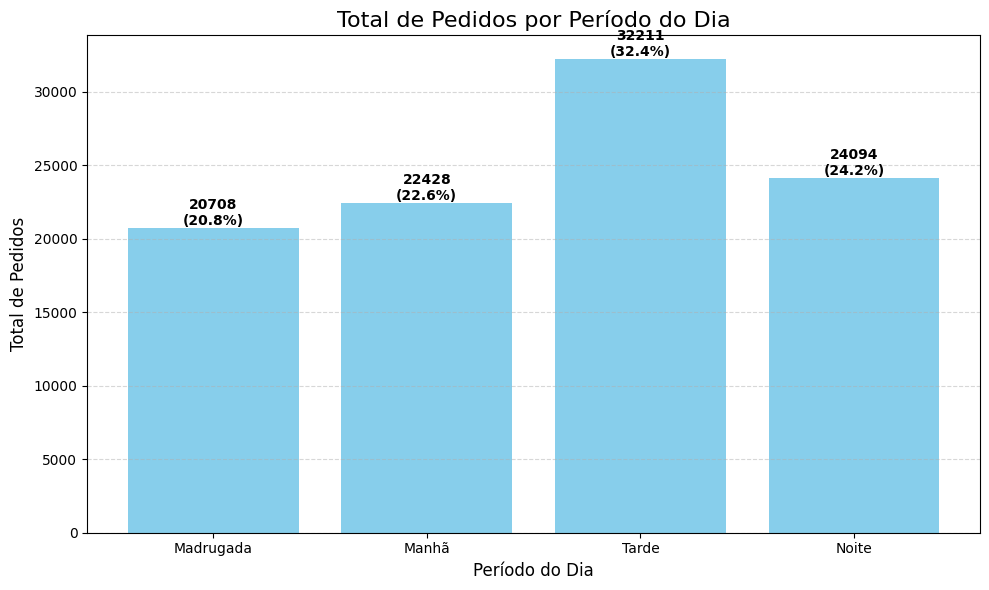

In [218]:
# Agora vamos gerar o gráfico do total de pedidos para o horário do dia!

# Calcular o total geral de pedidos
total_pedidos_geral = compras_por_periodo['total_pedidos'].sum()
# Calcular a porcentagem para cada período
compras_por_periodo['porcentagem'] = (compras_por_periodo['total_pedidos'] / total_pedidos_geral) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(
    compras_por_periodo['periodo_dia'],
    compras_por_periodo['total_pedidos'],
    color='skyblue'
)

plt.title('Total de Pedidos por Período do Dia', fontsize=16)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar os valores e porcentagens em cima de cada barra
for bar, total, pct in zip(bars, compras_por_periodo['total_pedidos'], compras_por_periodo['porcentagem']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(total)}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

E nessa ilustração é possível ver novamente o total de pedidos agora agrupado pelo período do dia (horário). 🕒

Nela, observa-se que a maior parte dos pedidos são feitos a tarde.

# 6.1 Comparação 2017-2018
Vamos exibir um gráfico de 2017 e 2018 para fazer uma comparação

In [219]:
# Mostrar um gráfico com os pedidos de 2017 e 2018 para exibir uma comparação.

# Converter a coluna 'mes' para datetime (caso ainda não esteja)
pedidos_mes_ajustados['mes'] = pd.to_datetime(pedidos_mes_ajustados['mes'])

# Filtrar apenas os anos de 2017 e 2018
pedidos_2017_2018 = pedidos_mes_ajustados[pedidos_mes_ajustados['mes'].dt.year.isin([2017, 2018])]

# Montar o gráfico de linhas para 2017 e 2018
# Extrair o Mês como colunas separadas
pedidos_2017_2018['ano'] = pedidos_2017_2018['mes'].dt.year
pedidos_2017_2018['mes_nome'] = pedidos_2017_2018['mes'].dt.strftime('%b') # nome abreviado do mês
pedidos_2017_2018['mes_num'] = pedidos_2017_2018['mes'].dt.month # ordenar corretamente

# Filtrar apenas meses de janeiro a agosto, pois 2018 os dados estão falhos depois de Agosto
pedidos_2017_2018 = pedidos_2017_2018[pedidos_2017_2018['mes_num'] <= 8]

/tmp/ipython-input-230166672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_mes_ajustados['mes'] = pd.to_datetime(pedidos_mes_ajustados['mes'])
/tmp/ipython-input-230166672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_2017_2018['ano'] = pedidos_2017_2018['mes'].dt.year
/tmp/ipython-input-230166672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [220]:
# Montar o gráfico de linhas para 2017 e 2018
# Extrair o Mês como colunas separadas
pedidos_2017_2018['ano'] = pedidos_2017_2018['mes'].dt.year
pedidos_2017_2018['mes_nome'] = pedidos_2017_2018['mes'].dt.strftime('%b') # nome abreviado do mês
pedidos_2017_2018['mes_num'] = pedidos_2017_2018['mes'].dt.month # ordenar corretamente

# Filtrar apenas meses de janeiro a agosto, pois 2018 os dados estão falhos depois de Agosto
pedidos_2017_2018 = pedidos_2017_2018[pedidos_2017_2018['mes_num'] <= 8]

In [221]:
# Criar uma tabela pivot
tabela_plot = pedidos_2017_2018.pivot_table(
    index='mes_num',
    columns='ano',
    values='total_pedidos'
    ).sort_index()

# Adiciona os nomes dos meses como rótulo do eixo x
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug']
x = np.arange(len(meses))
largura = 0.35

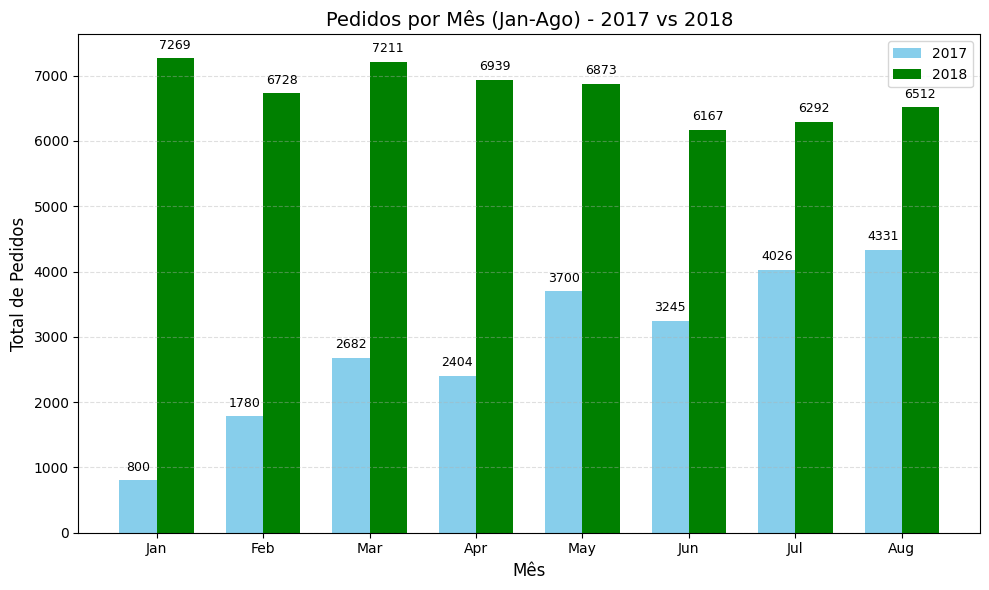

In [222]:
# Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
barras_2017 = ax.bar(x - largura/2, tabela_plot[2017], width=largura, label='2017', color='skyblue')
barras_2018 = ax.bar(x + largura/2, tabela_plot[2018], width=largura, label='2018', color='green')

# Adicionar valores sobre as barras
for i in range(len(meses)):
    valor_2017 = tabela_plot[2017].iloc[i]
    ax.text(x[i] - largura/2, valor_2017 + 100, f'{int(valor_2017)}',
            ha='center', va='bottom', fontsize=9)

    valor_2018 = tabela_plot[2018].iloc[i]
    ax.text(x[i] + largura/2, valor_2018 + 100, f'{int(valor_2018)}',
            ha='center', va='bottom', fontsize=9)

# customizações
plt.title('Pedidos por Mês (Jan-Ago) - 2017 vs 2018', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.xticks(x, meses)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Vamos checar a diferença de crescimento mês a mês de um ano para o outro. Em seguida fazer a média de crescimento mensal de cada ano para conseguirmos enxergar quanto foi o crescimento nos pedidos da OList.

In [223]:
# Calcular rescimento percentual mês a mês
crescimento_2017 = tabela_plot[2017].pct_change().dropna() * 100 # pct_change() obtem a variação mês a mês.
crescimento_2018 = tabela_plot[2018].pct_change().dropna() * 100

In [224]:
# Calcular média de crescimento de cada ano
media_crescimento_2017 = crescimento_2017.mean()
media_crescimento_2018 = crescimento_2018.mean()

print(f'Média de crescimento por mês 2017: {media_crescimento_2017:.2f}%')
print(f'Média de crescimento por mês 2018: {media_crescimento_2018:.2f}%')

Média de crescimento por mês 2017: 33.72%
Média de crescimento por mês 2018: -1.39%


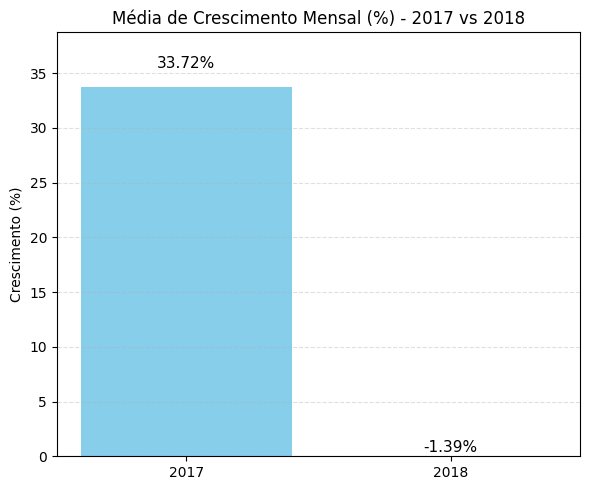

In [225]:
# Gráfico comparativo da média de crescimento
fig, ax = plt.subplots(figsize=(6, 5))
anos = ['2017', '2018']
medias = [media_crescimento_2017, media_crescimento_2018]
cores = ['skyblue', 'green']

barras = ax.bar(anos, medias, color=cores)

# Adicionar rótulos nas barras
for i, valor in enumerate(medias):
    ax.text(i, valor + 1.5, f'{valor:.2f}%', ha='center', va='bottom', fontsize=11)

plt.title('Média de Crescimento Mensal (%) - 2017 vs 2018')
plt.ylabel('Crescimento (%)')
plt.ylim(0, max(medias) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


No gráfico podemos ver que o número de pedidos cresceu imensamente para o ano de 2017, tendo um crescimento em média de 33,72% por mês.

Para o ano de 2018, por mais que o número demonstre uma certa "queda" isso pode ser justificado pelo fato de sazonalidade, e como não temos os dados até o final do ano, não podemos dizer de certeza mas pode-se concluir que para 2018 o número de pedidos permaneceu estável ao longo do ano, como iremos ver no gráfico em seguida.

In [226]:
# Criar uma lista com os meses (a partir de Fevereiro, pois o crescimento começa do segundo mês)
meses_crescimento = ['Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']

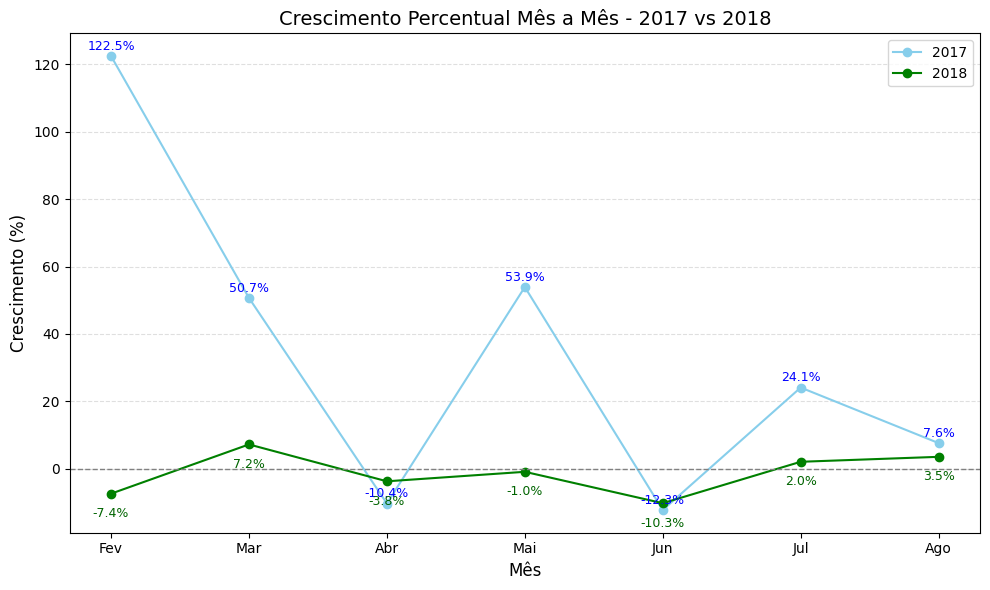

In [227]:
# Plotar gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(meses_crescimento, crescimento_2017, marker='o', label='2017', color='skyblue')
plt.plot(meses_crescimento, crescimento_2018, marker='o', label='2018', color='green')

# Adicionar rótulos nos pontos
for i, (v2017, v2018) in enumerate(zip(crescimento_2017, crescimento_2018)):
    plt.text(i, v2017 + 1, f'{v2017:.1f}%', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i, v2018 - 4, f'{v2018:.1f}%', ha='center', va='top', fontsize=9, color='darkgreen')

# Customizações
plt.title('Crescimento Percentual Mês a Mês - 2017 vs 2018', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Crescimento (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

O ano de 2017 o crescimento de Janeiro-fevereiro foi mais que o dobro, resultando em uma queda no gráfico em Fevereiro-Março, mas não quer dizer que o número de pedidos não continuou crescendo, apenas não foi tão acentuado.

Para o ano de 2018 nota-se que os pedidos variaram pouco perto da média mas que no geral se preservou a estabilidade dos pedidos.

Podemos dizer que 2017 foi um ano que apresentou um crescimento estrondoso no número de pedidos e 2018 até o mês de Agosto manteve a constância dos pedidos.

# Análise dos dados de pedidos ao longo do tempo

Pelo gráfico acima também podemos concluir que:

O e-commerce no Brasil realmente apresenta uma tendência de crescimento ao longo do tempo. Por exemplo para 2017 os pedidos tiveram um crescimento de 33,72% mensais. Podemos observar alguma sazonalidade, com picos em meses específicos, mas, no geral, é claro que os consumidores estão mais propensos a comprar online do que antes.

As segundas-feiras são o dia preferido dos consumidores brasileiros, e eles tendem a comprar mais durante as tardes.

Obs: há uma queda acentuada entre agosto de 2018 e setembro de 2018, e talvez a origem disso esteja relacionada a ruído nos dados. Para uma comparação mais justa entre 2017 e 2018, vamos considerar apenas os pedidos entre janeiro e agosto de ambos os anos.

# 7.0 Conclusão 🏁
Apresentando a conclusão de toda a nossa análise.

Vamos revisitar nossas questões e incluir nossas observações da análise.

1.0 Quais são as Melhores e Piores Categorias em vendas do site? O que leva essas categorias a estarem nesse patamar?



2.0 Quais os produtos com piores avaliações dos clientes? Quais justificativas esses produtos possuem para estar com avaliações tão baixas?



3.0 Como é o comportamento do número de pedidos ao longo do tempo?



4.0 Houve um crescimento do E-commerce no cenário brasileiro?

# Quais são as Melhores e Piores Categorias em vendas do site? O que leva essas categorias a estarem nesse patamar?

📊 Melhores Categorias:

As categorias com mais vendas incluem relojoaria, presentes, beleza e saúde, móveis e eletrônicos.

Estas categorias se destacam porque são frequentemente compradas como presentes, têm alto apelo emocional, são fáceis de comprar online e possuem alta rotatividade em campanhas promocionais.

📉 Piores Categorias:

CDs e DVDs, flores, e fraldas/higiene tiveram desempenho fraco.

Isso pode ser explicado por:
*   Obsolescência (CDs/DVDs).
*   Dificuldade logística e de conservação (flores e fraldas).
*   Preferência por compra física imediata (fraldas e higiene).


# Quais os produtos com piores avaliações dos clientes? Quais justificativas esses produtos possuem para estar com avaliações tão baixas?

🛑 Produtos com piores avaliações:

*   As análises indicam que produtos de categorias como fraldas_higiene e moveis_escritorio tendem a ter as menores médias de avaliação.


*   Para as categorias com mais nota 1 estrela, móveis_decoração e beleza_saude estão entre as campeãs mesmo ambas também estando nas listas de categorias que obtiveram o maior lucro.

🧐 Justificativas possíveis:


*   Problemas com embalagem e validade:
Há muitos relatos de produtos chegando com embalagem danificada, próximos da validade ou mal armazenados — o que compromete a confiança do consumidor.

* Produtos de uso recorrente:
Quanto mais vezes um cliente compra e avalia, maior a chance de insatisfação em alguma das compras, puxando a média para baixo.

* Baixa padronização entre marcas:
Em categorias de higiene, a variação de qualidade entre marcas é grande. Se o consumidor experimenta uma marca ruim, tende a avaliar negativamente o produto — e a categoria.

* Problemas logísticos:
Móveis são grandes, pesados e frágeis. Atrasos na entrega, peças danificadas ou faltando são comuns e costumam resultar em avaliações 1 ou 2.

* Expectativa vs. Realidade:
As fotos dos móveis nem sempre representam com fidelidade o produto real, gerando decepção visual ou funcional.

# Como é o comportamento do número de pedidos ao longo do tempo? E quando os Brasileiros tendem a comprar mais?


📈 O gráfico de pedidos ao longo do tempo mostra:

Uma tendência clara de crescimento entre 2016 e 2018.

Picos sazonais, provavelmente ligados a datas promocionais como Black Friday, Dia das Mães, Natal, etc.

Os consumidores brasileiros tendem a comprar mais às segundas-feiras à tarde.

# Categorias com grande lucro são as melhores avaliadas?

**Não necessariamente**.

A análise revelou que categorias com alto volume de vendas e, consequentemente, grande lucratividade, como "moveis_decoracao" e "beleza_saude", podem estar entre as que mais recebem avaliações negativas, especialmente notas 1.

Isso ocorre por diversos fatores:

Maior exposição: quanto mais produtos vendidos, maior o número de avaliações — o que amplia a chance de receber notas baixas.

Alta expectativa do consumidor: itens de decoração e beleza são altamente sensoriais e subjetivos; pequenas frustrações geram grandes impactos.

Problemas logísticos: categorias com itens frágeis, grandes ou com prazos sensíveis sofrem mais com atrasos e avarias.

Diferença entre expectativa e realidade: muitas avaliações negativas surgem de decepções com o produto entregue versus o que foi anunciado.

Portanto, lucratividade não garante boa avaliação. Uma operação lucrativa pode esconder falhas de experiência do cliente que só a análise de dados consegue revelar.



# Houve um crescimento do E-commerce no cenário brasileiro?


✅ Sim, a análise mostra um crescimento constante e claro ao longo dos anos.

O volume de pedidos aumenta significativamente de 2016 para 2018.

Apesar de variações sazonais, a tendência geral é positiva, o que demonstra maior adesão dos consumidores ao comércio eletrônico no Brasil.